In [77]:
import numpy as np

from env import YoutubeEnv

In [78]:
seed = 420
env = YoutubeEnv.random_env(seed=seed)

In [79]:
env

In [80]:
u = env.users[0]
c = env.channels[0]
for v in c.videos:
    print("v = ", v)
    print(u.watch(v))

v =  <videos.Video object at 0x2a24fd2470>
sim :  1e-07
0.0
v =  <videos.Video object at 0x2a25da1e80>
sim :  1e-07
0.0
v =  <videos.Video object at 0x2a25da1ba8>
sim :  1e-07
0.0


In [81]:
model_param = list(env.videos.values())

In [82]:
def thompson(nb_tries, cum_rewards, param):
    k = np.shape(nb_tries)[0]
    if param == "beta":
        # Beta prior
        try:
            samples = np.random.beta(cum_rewards + 1, nb_tries - cum_rewards + 1)
        except:
            samples = np.random.random(k)
    else:
        # Normal prior
        samples = np.random.normal(cum_rewards / (nb_tries + 1), 1. / (nb_tries + 1))
    return np.argmax(samples)

In [83]:
def get_reward(user, video):
    return user.watch(video)

In [84]:
def simulate(algo, model_param, user, param = None, time_horizon = 500):
    k = len(model_param)
    nb_tries = np.zeros(k, int)
    cum_rewards = np.zeros(k, float)
    action_seq = []
    reward_seq = []
    for t in range(time_horizon):
        a = algo(nb_tries, cum_rewards, param)
        r = get_reward(user, model_param[a])
        nb_tries[a] += 1
        cum_rewards[a] += r
        action_seq.append(a)
        reward_seq.append(r)
    index = np.where(nb_tries > 0)[0]
    best_action = index[np.argmax(cum_rewards[index] / nb_tries[index])]
    print("Best action (estimation) = ", best_action)
    print("Average reward of this action = ", cum_rewards[best_action] / nb_tries[best_action])
    return action_seq, reward_seq

In [85]:
def get_best_action(user, model_param):
    best_action, best_reward = (0, 0)
    for i in range(len(model_param)):
        rew = user.watch(model_param[i])
        if rew > best_reward:
            best_action = i
            best_reward = rew
    return best_action, best_reward

In [86]:
def get_regret(action_seq, reward_seq, best_actions, best_reward):
    time_horizon = len(action_seq)
    regret = np.zeros(time_horizon, float)
    precision = np.zeros(time_horizon, float)
    for t in range(time_horizon):
        regret[t] = reward_seq[t] - best_reward
    return regret, precision

In [87]:
def show_metrics(metrics, time_horizon):
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12, 4))
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Regret')
    ax1.plot(range(time_horizon),metrics[0], color = 'b')
    ax2.set_xlabel('Time')
    ax2.set_ylabel('Precision')
    ax2.set_ylim(-0.02,1.02)
    ax2.plot(range(time_horizon),metrics[1], color = 'b')
    plt.show()

sim :  0.8161131481554004
sim :  1e-07
sim :  1e-07
sim :  0.6663535951190471
sim :  0.2676046352395498
sim :  1e-07
sim :  0.8161131481554004
sim :  1e-07
sim :  0.28742527604872903
sim :  0.33189012099727244
sim :  0.25268487606320966
sim :  0.3090032163838914
sim :  1e-07
sim :  1e-07
sim :  0.2676046352395498
sim :  1e-07
sim :  0.3090032163838914
sim :  1e-07
sim :  1e-07
sim :  0.3094745060366353
sim :  0.35735037873515574
sim :  1e-07
sim :  1e-07
sim :  1e-07
sim :  1e-07
sim :  0.33189012099727244
sim :  1e-07
sim :  1e-07
sim :  1e-07
sim :  0.3090032163838914
sim :  1e-07
sim :  0.5770791412761851
sim :  0.35735037873515574
sim :  0.28742527604872903
sim :  0.25268487606320966
sim :  0.5770791412761851
sim :  0.33189012099727244
sim :  0.3090032163838914
sim :  0.6663535951190471
sim :  0.6663535951190471
sim :  1e-07
sim :  0.3090032163838914
sim :  1e-07
sim :  1e-07
sim :  0.35735037873515574
sim :  0.35735037873515574
sim :  1e-07
sim :  0.2676046352395498
sim :  0.35735

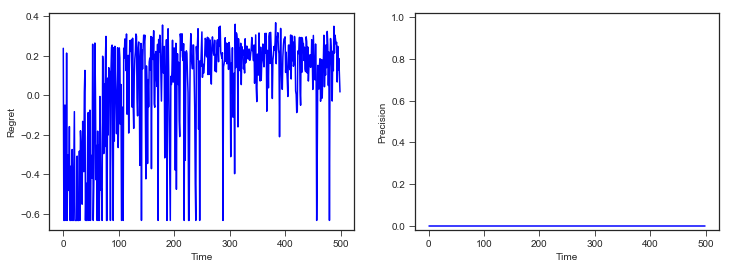

In [88]:
results = simulate(thompson, model_param, u)
regret = get_regret(*results, *get_best_action(u, model_param))
show_metrics(regret, 500)

In [89]:
get_best_action(u, model_param)

sim :  1e-07
sim :  1e-07
sim :  1e-07
sim :  0.3090032163838914
sim :  0.3090032163838914
sim :  0.2676046352395498
sim :  1e-07
sim :  1e-07
sim :  1e-07
sim :  0.33189012099727244
sim :  0.28742527604872903
sim :  0.33189012099727244
sim :  0.6663535951190471
sim :  0.5770791412761851
sim :  0.8161131481554004
sim :  1e-07
sim :  0.2676046352395498
sim :  1e-07
sim :  1e-07
sim :  1e-07
sim :  1e-07
sim :  0.35735037873515574
sim :  0.35735037873515574
sim :  0.2768024131204343
sim :  0.35735037873515574
sim :  0.3094745060366353
sim :  0.25268487606320966
sim :  1e-07
sim :  1e-07
sim :  1e-07


(14, 0.765027136511629)